**Feature Importance** - Feature importance methods assign scores to each feature in a dataset, indicating how much each feature contributes to the model's ability to make accurate predictions. Shap values are one of them.

**Shap (Shapley Additive Explanations) values** - a method for explaining the output of any machine learning model. Game theoretic approach to assign importance values to each feature. Version shap==0.41.0 supports color map changes.


**y** - target numerical variable. ( e.g. Theanine_Share )


**x**  - numerical data without y


**random. seed(42)** -  a pop-culture reference! In Douglas Adams's popular 1979 science-fiction novel The Hitchhiker's Guide to the Galaxy, towards the end of the book, the supercomputer Deep Thought reveals that the answer to the great question of “life, the universe and everything” is 42.







In [36]:
pip install matplotlib plotly scikit-learn mxnet-mkl==1.6.0 numpy==1.23.1 shap==0.41.0


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import math
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 191)
%matplotlib inline
from pandas import read_excel

import os
import scipy.ndimage
import scipy.stats
import plotly.express as px
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble, model_selection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
import seaborn as sns
import numpy as np
np.bool = np.bool_
import shap

In [38]:
print(shap.__version__)

0.41.0


In [42]:
# Load the excel file
my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'Tee2.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df)

                       Tea  Theanine_mg_in_1g_tea  Caffeine_mg_in_1g_tea  \
0             Matcha_Basic                  10.00                  20.00   
1        Matcha_Ceremonial                  20.00                  20.00   
2                   Sencha                   2.92                  11.32   
3                   Pu_Erh                   0.01                  30.00   
4                Gunpowder                   3.83                  13.07   
5                   Oolong                   6.00                  20.00   
6                Earl_Grey                   2.70                  16.48   
7   Darjeeling_First_Flush                   4.25                  14.10   
8                    Assam                   5.69                  19.93   
9                   Ceylon                   4.33                  14.61   
10              Pai_Mu_Tan                   1.30                   4.00   
11                 Chun_Me                   6.11                  12.00   
12          

In [43]:
print (df.dtypes)

Tea                       object
Theanine_mg_in_1g_tea    float64
Caffeine_mg_in_1g_tea    float64
Theanine_Share           float64
Continent                 object
Country                   object
Woe_name                  object
Latitude                 float64
Longitude                float64
Flavor                    object
Min_Elevation_m            int64
Max_Elevation_m            int64
Average_Elevation_m        int64
Type                      object
Color                     object
dtype: object


In [44]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [45]:
df.columns = df.columns.str.strip()

In [46]:
df.set_index("Tea",drop=True,inplace=True)

In [10]:
# Declare Categorical and Numerical Columns

In [47]:
# Data
X = df.drop(['Theanine_Share'], axis=1)
#print(df_num)

# Target
y = df['Theanine_Share']
#print(y)

In [48]:
# Data
categorical_columns = ["Continent","Country", "Woe_name", "Flavor","Type", "Color"]
numerical_columns = ["Latitude","Longitude","Theanine_mg_in_1g_tea", "Caffeine_mg_in_1g_tea", "Min_Elevation_m", "Max_Elevation_m", "Average_Elevation_m"]

In [49]:
# fit model
enc = OrdinalEncoder()
X[categorical_columns] = enc.fit_transform(X[categorical_columns] )
# Combine Numerical and categorical data
x = X[categorical_columns + numerical_columns]


In [50]:
# Default test_size is 0.25, or 25 percent.
# 25 percent of samples are assigned to the test set, 75% is for training
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [54]:
# Create and train the RandomForestRegressor
regressor = ensemble.RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
# Create an explainer for the RandomForestRegressor
explainer = shap.TreeExplainer(regressor)

# Calculate SHAP values for the training dataset
shap_values = explainer.shap_values(x_train)

In [57]:
# Assuming 'shap_values' and 'X_train' are already calculated
features = x_train.columns.tolist()

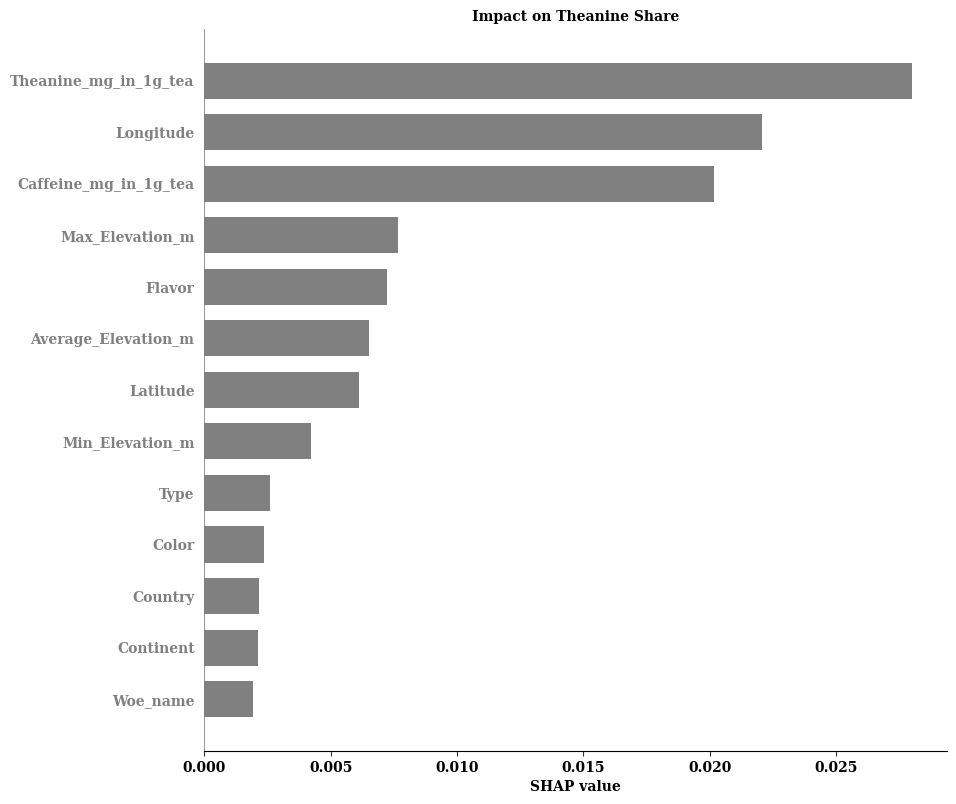

In [94]:
shap.summary_plot(shap_values, x_train,show=False, feature_names=features, plot_size=(10,8), plot_type="bar", color="grey")
plt.title('Impact on Theanine Share',fontsize=15,fontproperties="serif",weight='bold')
plt.yticks(fontsize=10,color='grey',fontproperties="serif",weight='bold')
plt.xticks(fontsize=10,color='black',fontproperties="serif",weight='bold')
plt.xlabel('SHAP value',fontsize=10,fontproperties="serif",weight='bold')
plt.show()

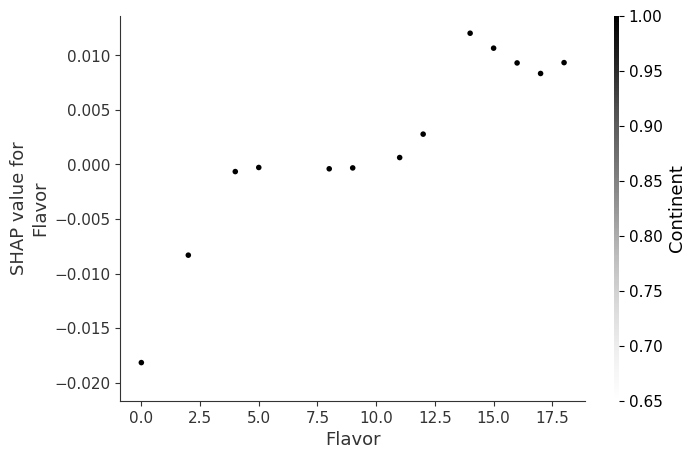

In [81]:
# Assuming 'shap_values', 'X_train', and 'features' are available
feature_index = 3 # 4 Txpe, 5 Color, 3 Flavor, ...
shap.dependence_plot(feature_index, shap_values, x_train, feature_names=features, cmap="Greys")
plt.show()
#plt.show()

In [98]:
# x_train and y_train rows count (e.g. 15) must be the same
print(x_train.shape)
print(y_train.shape)

(14, 13)
(14,)


In [95]:
# print(x_train)

In [96]:
# print(y_train)